**Oбучение с подкреплением: задача о "многоруком бандите"**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
import numpy as np
from numpy import random as rng
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

np.set_printoptions(precision=3)

In [2]:
# определяем "многорукого бандита"

# вероятности выйгрыша для каждого выбора
p_bandit = [ .55, .2, .81, .3, .35,  .70,  ] 

def pull(a,p_bandit=p_bandit): # играем вариант 'a'
    return int( rng.rand() < p_bandit[a])


In [3]:
# одна игра
def game(
    p, # стратегия выбора
    p_bandit=p_bandit, # параметры распределений среды
    n_iter=5, # количество поппыток
    Q = np.zeros(len(p_bandit),dtype=np.float32), # средняя "награда" для действия
    N = np.zeros(len(p_bandit),dtype=np.int32), # количество попыток применить действие
    ):
    
    R = 0 # суммарная "награда" для действия за игру
    E = 0 # количесво ошибок за игру
    
    for i in range(n_iter):
        action = p(Q) #  выбираем действие
        reward = pull(action,p_bandit) # применяем действие
        N[action] += 1 # увеличиваем счётчик выбора действия
        Q[action] += 1./N[action] * (reward - Q[action]) # оценка выйгрыша от действия
        R += reward # сумарный выйгрыш 
        E += (reward<=0) # ошибка выбора (нет выйгрыша)
    
    return (R/n_iter,Q,N,E/n_iter)

In [4]:
def plot_eval(mean_reward,mean_error):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
    
    ax1.plot(mean_reward,label='mean reward',c='g')
    #ax1.set_ylim([0,1])
    ax1.grid()
    ax1.legend()
    
    ax2.plot(mean_error,label='% error',c='r')
    ax2.set_ylim([0,1])
    ax2.grid()
    ax2.legend()

In [5]:
def evaluate(
    p, # стратегия выбора
    bandit=p_bandit, # параметры распределений среды
    n_epoch=10, # количество игр
    ):
    
    # начальная статистика
    Q = np.zeros(len(p_bandit),dtype=np.float32) # оценка выйгрыша от действия
    N = np.zeros(len(p_bandit),dtype=np.int32) # количество попыток применить действие
    
    mean_error = [] # среднее количество ошибок за игру
    mean_reward = [] 
    
    for i in tqdm(range(n_epoch)):
        R,Q,N,E = game( p, p_bandit=p_bandit, n_iter=5,Q=Q,N=N )
        
        mean_error.append(E)
        mean_reward.append(R)
            
    print('выбор стратегии - "бандит" номер:', np.argmax(Q) )
    print('реально наилучший выбор - "бандит" номер:', np.argmax(p_bandit) )    
    print('средний выйгрыш:',  np.mean(mean_reward) )

    plot_eval(mean_reward,mean_error)

#     return mean_error,mean_reward

  0%|          | 0/100 [00:00<?, ?it/s]

выбор стратегии - "бандит" номер: 2
реально наилучший выбор - "бандит" номер: 2
средний выйгрыш: 0.514


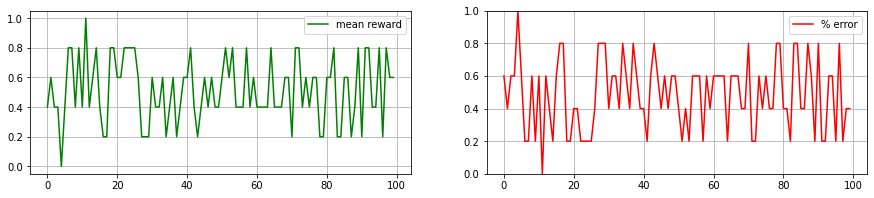

In [7]:
def p_random(Q):
    n_action = len(Q)
    return rng.randint(n_action)

evaluate( p_random, n_epoch=100,  )

  0%|          | 0/100 [00:00<?, ?it/s]

выбор стратегии - "бандит" номер: 5
реально наилучший выбор - "бандит" номер: 2
средний выйгрыш: 0.732


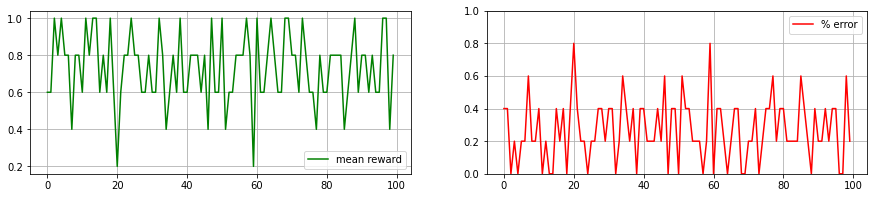

In [8]:
# простая "жадная" стратегия
def p_greedy(Q):
    n_action = len(Q)
    return np.argmax(Q) if sum(Q)>1 else rng.randint(n_action) 

evaluate( p_greedy, n_epoch=100,  )

  0%|          | 0/100 [00:00<?, ?it/s]

выбор стратегии - "бандит" номер: 2
реально наилучший выбор - "бандит" номер: 2
средний выйгрыш: 0.7899999999999998


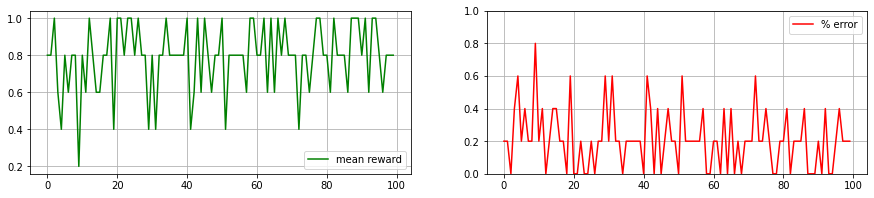

In [9]:
# "E-жадная" стратегия
def p_e_greedy(Q,e=.1):
    n_action = len(Q)
    if rng.rand()<e : return rng.randint(n_action)
    return np.argmax(Q) if sum(Q)>1 else rng.randint(n_action) 

evaluate( p_e_greedy, n_epoch=100,  )


In [ ]:
# np.mean(mean_reward)

  0%|          | 0/100 [00:00<?, ?it/s]

выбор стратегии - "бандит" номер: 2
реально наилучший выбор - "бандит" номер: 2
средний выйгрыш: 0.6379999999999999


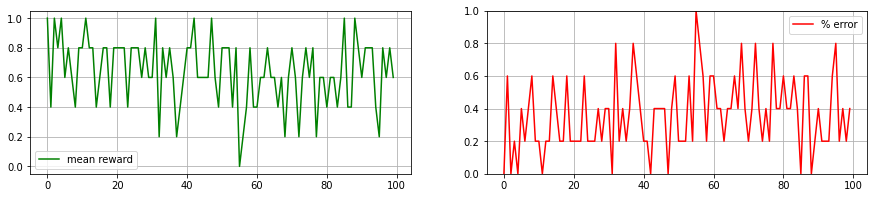

In [10]:
# Softmax стратегия
from scipy.special import softmax

def p_softmax(Q,t=.5):
    n_action = len(Q)
    sQ = softmax(Q/t) 
    return np.argmax( (rng.rand(n_action)<sQ) * sQ )  

evaluate( p_softmax, n_epoch=100,  )



In [11]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.8.9
IPython version      : 8.3.0

matplotlib: 3.5.2
numpy     : 1.22.3

